<a href="https://colab.research.google.com/github/kazishuvo22/fastMRI-Reconstruction/blob/master/X_train_Y_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm

In [2]:
low_path = "/content/drive/My Drive/CSE499N/Single Coil 4x/low"
high_path = "/content/drive/My Drive/CSE499N/Single Coil 4x/high"

In [3]:
low_data= glob.glob(os.path.join(low_path,'*.npy'))
high_data= glob.glob(os.path.join(high_path,'*.npy'))

len(low_data), len(high_data)

(100, 100)

In [4]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    print(img.shape[-1])
    print(type(img.shape[-1]))
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img


def change_depth(img):

    img_start = img[:,:,:4]
    
    mid = int(img.shape[-1]/2)
    img_middle = img[:,:,mid-10:mid+10]
    
    img_end = img[:,:,-4:]
    img = np.concatenate((img_start, img_middle, img_end), axis=2)
    return img
  
def normalize(image):
    flat = image.flatten()
    MIN_BOUND = min(flat)
    MAX_BOUND = max(flat)
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image


def norm_vol(img):
    '''Normalize slices individually'''
    img_norm = []
    for i in img:
        i = normalize(i)
        img_norm.append(i)
        i=None
        
    img_norm = np.array(img_norm)
    img = None
    
    return img_norm

def show_slices(data, slice_nums, cmap=None):
    data = np.moveaxis(data, 2, 0)
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)


def plot_hist(img):
    img_flat = img.flatten()
    print(min(img_flat), max(img_flat))
    plt.hist(img_flat, bins=20, color='c')
    plt.title("Original input data distribution")
    plt.xlabel("Raw")
    plt.grid(True)
    plt.ylabel("Frequency")
    plt.show()

#X train and y train

##For X_train slices from low data and save x_train

In [17]:
low_slices_DIR = "/content/drive/My Drive/CSE499N/Single Coil 4x/low_slices"

In [5]:
total_slices = 0
c=0

x_train = []

for l in tqdm(low_data[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        
        x_train.append(img)
        
        #img = normalize(img) # Normalize image
        #cv2.imwrite("{}/{}_{}.png".format(low_slices_path, c, i), img * 255)
        #np.save("{}/{}_{}.npy".format(low_slices_DIR, c, i), img)
        img = None
        
    img_3d = None
    c+=1

x_train = np.array(x_train)
print(x_train.shape)

100%|██████████| 100/100 [02:44<00:00,  1.65s/it]


(3607, 320, 320)


In [6]:
low_slices_path = glob.glob(os.path.join(low_slices_DIR,'*.npy'))
len(low_slices_path)

3242

In [34]:
save_path = "/content/drive/My Drive/CSE499N/Single Coil 4x"

In [8]:
x_train.shape

(3607, 320, 320)

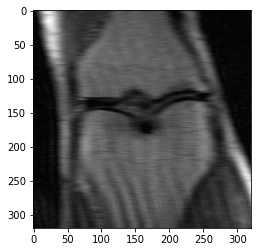

In [32]:
plt.imshow(x_train[300],cmap='gray')

In [16]:
np.save("{}/x_train.npy".format(save_path), x_train)

##For Y_train slices from high data and save y_train

In [23]:
high_slices_DIR = "/content/drive/My Drive/CSE499N/Single Coil 4x/high_slices"

In [24]:
total_slices = 0
c=0

y_train = []

for l in tqdm(high_data[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        
        y_train.append(img)
        
        #img = normalize(img) # Normalize image
        #cv2.imwrite("{}/{}_{}.png".format(high_slices_path, c, i), img * 255)
        #np.save("{}/{}_{}.npy".format(high_slices_DIR, c, i), img)
        img = None
        
    img_3d = None
    c+=1

y_train = np.array(y_train)
print(y_train.shape)

100%|██████████| 100/100 [03:10<00:00,  1.91s/it]


(3607, 320, 320)


In [25]:
high_slices_path = glob.glob(os.path.join(high_slices_DIR,'*.npy'))
len(high_slices_path)

3607

In [26]:
y_train.shape

(3607, 320, 320)

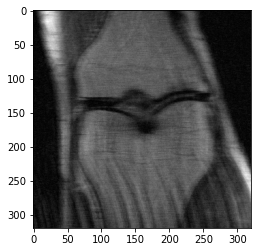

In [31]:
plt.imshow(y_train[300],cmap='gray')

In [36]:
np.save("{}/y_train.npy".format(save_path), y_train)

In [37]:
print("completeeeeee!!!!!!")

completeeeeee!!!!!!
